importo librerias

In [9]:
# Se importan las liberías necesarias para realizar el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine

cargo los dataset 

In [91]:
df_victimas = pd.read_parquet(r'D:\projectos\programacion\henrry\bootcamp\proyecto_individuales\2\Proyecto_Individual_N-2_kalchichen_lucas\dataset\ETL_datasets\victimas_clean.parquet')
df_hechos = pd.read_parquet(r'D:\projectos\programacion\henrry\bootcamp\proyecto_individuales\2\Proyecto_Individual_N-2_kalchichen_lucas\dataset\ETL_datasets\hechos_clean.parquet')

In [30]:
df_hechos

,id_hecho,cantidad_victimas,fecha,hora,lugar_del_hecho,tipo_de_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado
0,2016-0001,1,2016-01-01,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8.0,-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9.0,-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AV ENTRE RIOS 2034,AVENIDA,1.0,-58.390403,-34.631894,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8.0,-58.465039,-34.680930,MOTO,SD
4,2016-0005,1,2016-01-21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1.0,-58.387183,-34.622466,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,17,AV. RIESTRA Y MOM,AVENIDA,7.0,-58.433538,-34.645616,MOTO,AUTO
692,2021-0094,1,2021-12-20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9.0,-58.467398,-34.651178,MOTO,AUTO
693,2021-0095,1,2021-12-30,0,AV. GAONA Y TERRADA,AVENIDA,11.0,-58.472934,-34.619847,MOTO,CARGAS
694,2021-0096,1,2021-12-15,10,AV. EVA PERON 4071,AVENIDA,9.0,-58.470668,-34.650217,AUTO,CARGAS


total de accidentes

In [19]:

print("El total de homicidios del 2016 al 2021 son: ", df_hechos['id_hecho'].nunique())
print("El total de victimas que perdieron la vida del año 2016 al 2021 son: ", df_hechos['cantidad_victimas'].sum())

El total de homicidios del 2016 al 2021 son:  696
El total de victimas que perdieron la vida del año 2016 al 2021 son:  717


Gradicos Estadisticos

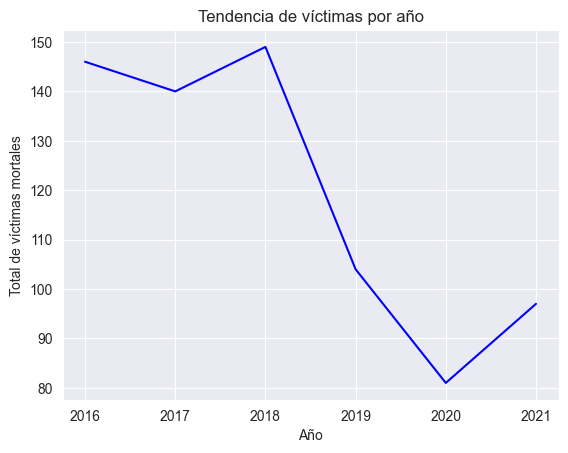

In [49]:

# Se calcula el número de homicidios por año
homicidios_por_anio = df_victimas.groupby(df_victimas['fecha'].dt.year)['fecha'].size()

# Se grafica el total de homicidios por año utilizando Seaborn
sns.set_style("darkgrid")  # Estilo de grilla de fondo
sns.lineplot(x=homicidios_por_anio.index, y=homicidios_por_anio.values, color='b')
plt.title('Tendencia de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Total de víctimas mortales')
plt.grid(True)
plt.show()


se puede apreciar como bajo el indice de muertos por accidentes viales durante la pandemia 

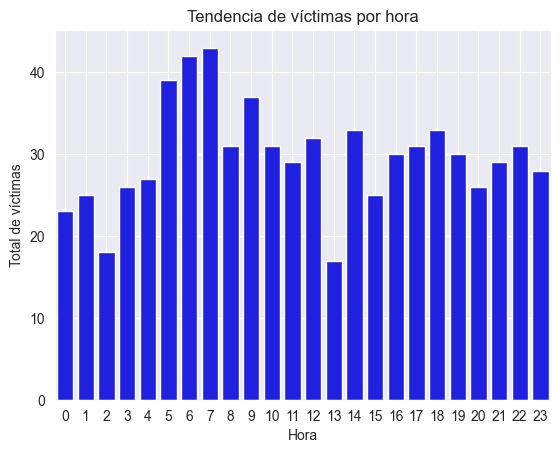

In [47]:
# Se calcula el número de homicidios por hora
homicidios_por_hora = df_hechos.groupby('hora')['cantidad_victimas'].sum().reset_index(name='total_homicidios')

sns.set_style("darkgrid")  # Estilo de grilla de fondo
sns.barplot(x=homicidios_por_hora.index, y=homicidios_por_hora['total_homicidios'].values, color='b')
plt.title('Tendencia de víctimas por hora')
plt.xlabel('Hora')
plt.ylabel('Total de víctimas')
plt.grid(True)
plt.show()

5 peores horarios para transitar

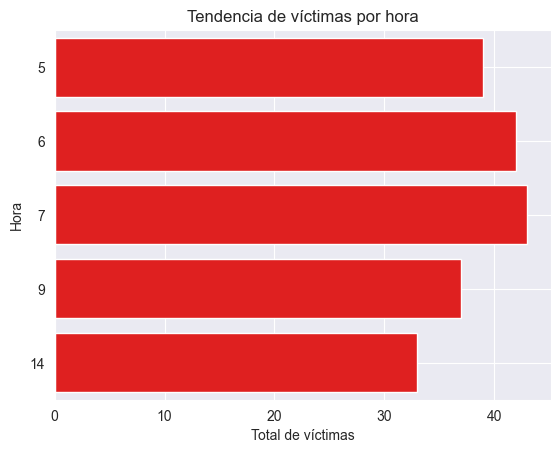

In [48]:
top_5_horas = homicidios_por_hora.nlargest(5, 'total_homicidios')

sns.set_style("darkgrid")  # Estilo de grilla de fondo
sns.barplot(x=top_5_horas['total_homicidios'], y=top_5_horas['hora'], color='r' , orient='h')
plt.title('Tendencia de víctimas por hora')
plt.xlabel('Total de víctimas')
plt.ylabel('Hora')
plt.grid(True)
plt.show()

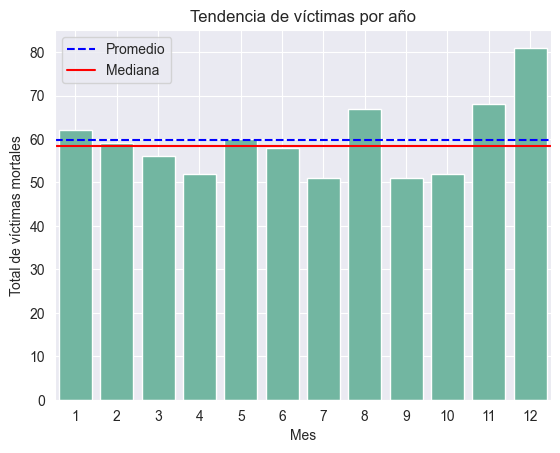

In [70]:
homicidios_por_mes = df_victimas.groupby(df_victimas['fecha'].dt.month)['fecha'].size()

sns.set_style("darkgrid")  # Estilo de grilla de fondo
sns.set_palette("Set2")  # Cambiar la paleta de colores
sns.barplot(x=homicidios_por_mes.index, y=homicidios_por_mes.values)

promedio = homicidios_por_mes.mean()
mediana = homicidios_por_mes.median()
plt.axhline(promedio, color='blue', linestyle='--', label='Promedio')
plt.axhline(mediana, color='red', linestyle='-', label='Mediana')

plt.title('Tendencia de víctimas por año')
plt.xlabel('Mes')
plt.ylabel('Total de víctimas mortales')
plt.legend()
plt.grid(True)
plt.show()

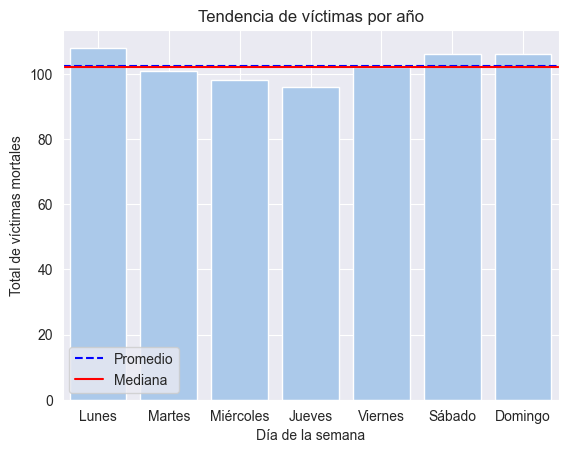

In [92]:
# Se calcula el número de homicidios por día
homicidios_por_dia = df_victimas.groupby(df_victimas['fecha'].dt.dayofweek)['fecha'].size()
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}

homicidios_por_dia.index = homicidios_por_dia.index.map(dias_semana)

sns.set_style("darkgrid")
sns.set_palette("pastel")  # Cambiar la paleta de colores a pastel
sns.barplot(x=homicidios_por_dia.index, y=homicidios_por_dia.values)

promedio = homicidios_por_dia.mean()
mediana = homicidios_por_dia.median()
plt.axhline(promedio, color='blue', linestyle='--', label='Promedio')
plt.axhline(mediana, color='red', linestyle='-', label='Mediana')

plt.title('Tendencia de víctimas por año')
plt.xlabel('Día de la semana')
plt.ylabel('Total de víctimas mortales')
plt.legend()
plt.grid(True)
plt.show()

### observaciones
* se aprecia que los acidentes viales con victimas ocurren comunmete entre las 6 y 7 de la madrugada los dias
* los dias sabados y domingos ocurren la mayor parte de los accidentes se puede suponer porque es a la hora que la gente vuelve de los boliches 
* La mayor parte de los accidentes ocurren en horarios pico es decir entre 7 a 9 (horario de entrada laboral) y entre las 13 y las 14 (horario de salida laboral)


In [101]:
# Se agrupa los datos por año y categoría
homicidios_por_vehiculo_victima = df_victimas.groupby(['vehiculo_victima']).size().reset_index(name='total_homicidios')

homicidios_por_vehiculo_victima_year = df_victimas.groupby(['vehiculo_victima', df_victimas['fecha'].dt.year])['fecha'].size().reset_index(name='total_homicidios')

homicidios_por_vehiculo_victima_year

# Se filtran las filas con el valor 'SD' en la columna 'tipo_vehiculo'
filtro1 = homicidios_por_vehiculo_victima['vehiculo_victima'] != 'SD'
filtro2 = homicidios_por_vehiculo_victima_year['vehiculo_victima'] != 'SD'
# Se eliminan las filas con el valor 'SD' en la columna 'tipo_vehiculo'
homicidios_por_vehiculo_victima = homicidios_por_vehiculo_victima[filtro1]
homicidios_por_vehiculo_victima_year = homicidios_por_vehiculo_victima_year[filtro2]

homicidios_por_vehiculo_victima_year

,vehiculo_victima,fecha,total_homicidios
0,AUTO,2016,18
1,AUTO,2017,25
2,AUTO,2018,17
3,AUTO,2019,11
4,AUTO,2020,12
5,AUTO,2021,11
6,BICICLETA,2016,4
7,BICICLETA,2017,4
8,BICICLETA,2018,3
9,BICICLETA,2019,7


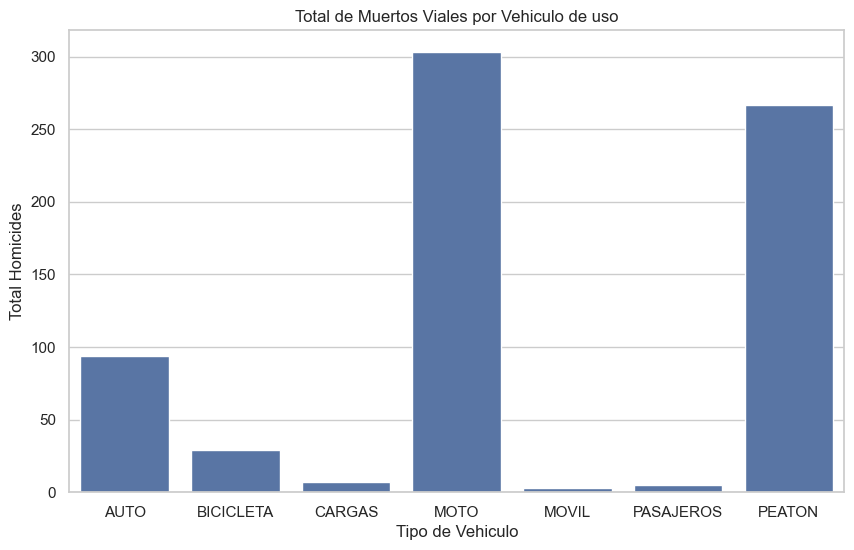

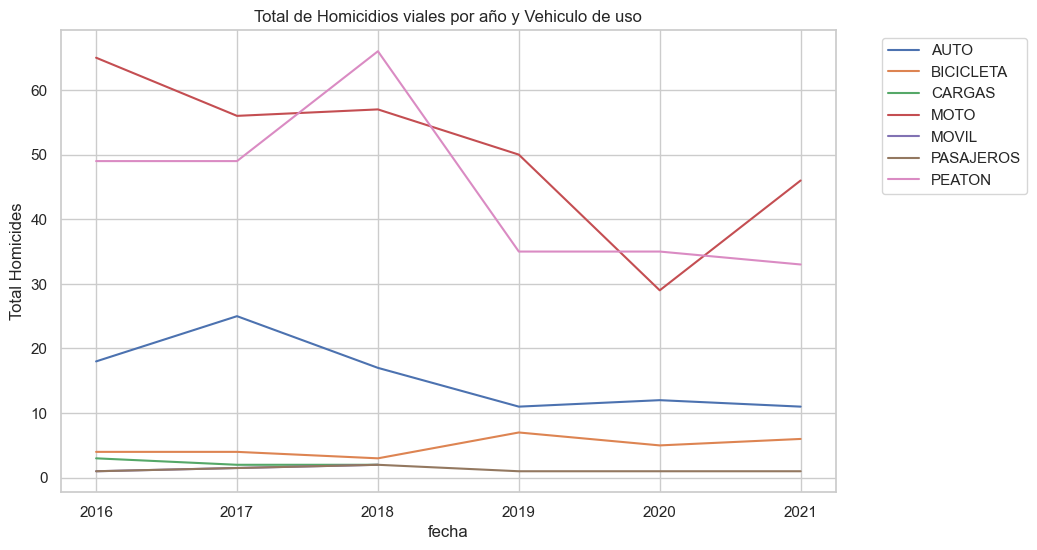

In [103]:



# Plot 1: Bar plot of total homicides by vehicle type
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='vehiculo_victima', y='total_homicidios', data=homicidios_por_vehiculo_victima, ax=ax)
ax.set_title('Total de Muertos Viales por Vehiculo de uso')
ax.set_xlabel('Tipo de Vehiculo')
ax.set_ylabel('Total Homicides')

# Plot 2: Line plot of total homicides by vehicle type and fecha
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='fecha', y='total_homicidios', hue='vehiculo_victima', data=homicidios_por_vehiculo_victima_year, ax=ax)
ax.set_title('Total de Homicidios viales por año y Vehiculo de uso')
ax.set_xlabel('fecha')
ax.set_ylabel('Total Homicides')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Según se muestra en la gráfica anterior, los conductores y peatones son los más afectados por los siniestros viales. Estos datos sugieren la necesidad de establecer futuras medidas educativas en materia de seguridad vial, dirigidas tanto a peatones como a conductores de moto vehiculos.

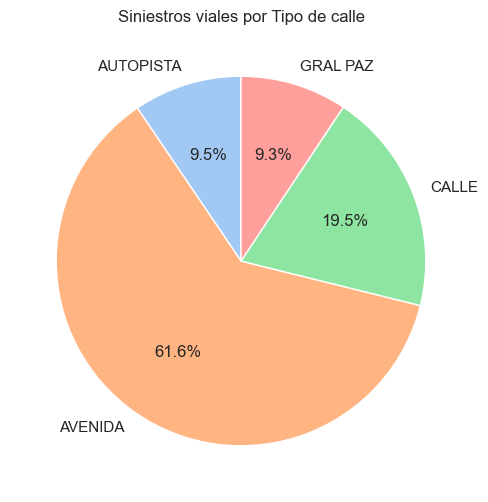

In [108]:

# Se calcula el número de homicidios por calle
Homicidios_Por_Calle = df_hechos.groupby(df_hechos['tipo_de_calle']).size()

# Se grafica la información obtenida
sns.set_palette('pastel')
plt.figure(figsize=(10, 6))
plt.pie(Homicidios_Por_Calle, labels=Homicidios_Por_Calle.index, autopct='%1.1f%%', startangle=90)

plt.title('Siniestros viales por Tipo de calle')
plt.show()

Las avenidas son el tipo de calle que genera mayor preocupación, ya que registran más de 400 siniestros viales, lo que representa más del 60% de todos los accidentes.
